# Import Required Libraries
Import all necessary libraries such as pandas, numpy, matplotlib, seaborn, and machine learning libraries like sklearn and xgboost.

In [4]:
# Importing necessary libraries for data manipulation, visualization, and machine learning

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Setting up Arabic font for visualizations
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Markdown explanation
"""
### Import Required Libraries
In this section, we import all the necessary libraries for our sales prediction system. These include:
- **pandas** and **numpy** for data manipulation and analysis.
- **matplotlib** and **seaborn** for data visualization.
- **scikit-learn** for machine learning tasks such as data preprocessing, model training, and evaluation.
- **xgboost** for advanced gradient boosting models.
- **warnings** to suppress unnecessary warnings for cleaner output.
- We also configure the visualizations to support Arabic fonts for better readability in charts.
"""

'\n### Import Required Libraries\nIn this section, we import all the necessary libraries for our sales prediction system. These include:\n- **pandas** and **numpy** for data manipulation and analysis.\n- **matplotlib** and **seaborn** for data visualization.\n- **scikit-learn** for machine learning tasks such as data preprocessing, model training, and evaluation.\n- **xgboost** for advanced gradient boosting models.\n- **warnings** to suppress unnecessary warnings for cleaner output.\n- We also configure the visualizations to support Arabic fonts for better readability in charts.\n'

# Load and Explore Data
Load the dataset, display its structure, and perform initial exploratory data analysis (EDA) to understand the data.

In [5]:
# Markdown explanation
"""
### Load and Explore Data
In this section, we load the dataset, display its structure, and perform initial exploratory data analysis (EDA) to understand the data. This includes:
- Loading the dataset from a CSV file.
- Displaying the first few rows to get a glimpse of the data.
- Checking the data types and structure.
- Generating descriptive statistics for numerical columns.
- Identifying missing values in the dataset.
"""


# Load the dataset
df = pd.read_csv('../data/Daily_sales.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Display the structure and data types of the dataset
print("\nDataset Information:")
df.info()

# Generate descriptive statistic
# s for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
display(df.isnull().sum())

First 5 rows of the dataset:


,sale_date,day_of_week,invoices_count,total_quantity,total_discount,total_amount
0,2023-01-01,Sunday,9,21,105.15,21189.37
1,2023-01-02,Monday,8,12,7.86,23938.94
2,2023-01-03,Tuesday,12,20,14.95,17767.07
3,2023-01-04,Wednesday,15,22,24.01,20299.96
4,2023-01-05,Thursday,15,26,29.18,29530.65



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_date       425 non-null    object 
 1   day_of_week     425 non-null    object 
 2   invoices_count  425 non-null    int64  
 3   total_quantity  425 non-null    int64  
 4   total_discount  425 non-null    float64
 5   total_amount    425 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 20.1+ KB

Descriptive Statistics:


,invoices_count,total_quantity,total_discount,total_amount
count,425.000000,425.000000,425.000000,425.000000
mean,17.268235,29.654118,64.017059,41191.418447
std,4.613715,8.772028,136.009887,32852.641695
min,8.000000,11.000000,0.000000,9205.310000
25%,15.000000,24.000000,11.620000,25611.090000
50%,17.000000,28.000000,41.640000,30992.220000
75%,19.000000,34.000000,81.520000,42752.660000
max,32.000000,68.000000,2245.890000,229857.100000



Missing Values:


sale_date         0
day_of_week       0
invoices_count    0
total_quantity    0
total_discount    0
total_amount      0
dtype: int64

# Prepare Datetime Features
Create datetime-related features such as year, month, day, and other calendar-based features.

In [ ]:
# Markdown explanation
"""
### Prepare Datetime Features
In this section, we create datetime-related features from the `sale_date` column. These features include:
- **Year, Month, Day**: Extracting the year, month, and day from the date.
- **Day of Week, Day of Year,

 Week of Year**: Adding calendar-based features.
- **Logical Features**: Identifying weekends, month start, and month end.
"""

# Convert the 'sale_date' column to datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Sort the data by 'sale_date' and reset the index
df = df.sort_values('sale_date').reset_index(drop=True)

# Set 'sale_date' as the index
df.set_index('sale_date', inplace=True)

# Create datetime-related features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['day_of_year'] = df.index.dayofyear
df['week_of_year'] = df.index.isocalendar().week

# Create logical features
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_month_start'] = df.index.is_month_start.astype(int)
df['is_month_end'] = df.index.is_month_end.astype(int)

# Display the first few rows to verify the new features
print("First 5 rows with datetime features:")
display(df.head())

First 5 rows with datetime features:


,day_of_week,invoices_count,total_quantity,total_discount,total_amount,year,month,day,day_of_year,week_of_year,is_weekend,is_month_start,is_month_end
sale_date,,,,,,,,,,,,,
2023-01-01,6,9,21,105.15,21189.37,2023,1,1,1,52,1,1,0
2023-01-02,0,8,12,7.86,23938.94,2023,1,2,2,1,0,0,0
2023-01-03,1,12,20,14.95,17767.07,2023,1,3,3,1,0,0,0
2023-01-04,2,15,22,24.01,20299.96,2023,1,4,4,1,0,0,0
2023-01-05,3,15,26,29.18,29530.65,2023,1,5,5,1,0,0,0


# Create Lag Features
Generate lag features for sales, quantities, invoices, and discounts to capture temporal dependencies.

In [7]:
# Markdown explanation
"""
### Create Lag Features
In this section, we generate lag features for sales, quantities, invoices, and discounts. Lag features help capture temporal dependencies in the data by referencing past values. Specifically, we create:
- Lag features for sales (`total_amount`) at intervals of 1, 2, 3, 7, 14, and 30 days.
- Lag features for quantities (`total_quantity`) at intervals of 1 and 7 days.
- Lag features for invoices (`invoices_count`) at intervals of 1 and 7 days.
- Lag features for discounts (`total_discount`) at intervals of 1 and 7 days.
"""

# Generate lag features for sales
for lag in [1, 2, 3, 7, 14, 30]:
    df[f'sales_lag_{lag}'] = df['total_amount'].shift(lag)

# Generate lag features for quantities
for lag in [1, 7]:
    df[f'quantity_lag_{lag}'] = df['total_quantity'].shift(lag)

# Generate lag features for invoices
for lag in [1, 7]:
    df[f'invoices_lag_{lag}'] = df['invoices_count'].shift(lag)

# Generate lag features for discounts
for lag in [1, 7]:
    df[f'discount_lag_{lag}'] = df['total_discount'].shift(lag)

# Display the first few rows to verify the new lag features
print("First 5 rows with lag features:")
display(df.head())

First 5 rows with lag features:


,day_of_week,invoices_count,total_quantity,total_discount,total_amount,year,month,day,day_of_year,week_of_year,...,sales_lag_3,sales_lag_7,sales_lag_14,sales_lag_30,quantity_lag_1,quantity_lag_7,invoices_lag_1,invoices_lag_7,discount_lag_1,discount_lag_7
sale_date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,6,9,21,105.15,21189.37,2023,1,1,1,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,0,8,12,7.86,23938.94,2023,1,2,2,1,...,NaN,NaN,NaN,NaN,21.0,NaN,9.0,NaN,105.15,NaN
2023-01-03,1,12,20,14.95,17767.07,2023,1,3,3,1,...,NaN,NaN,NaN,NaN,12.0,NaN,8.0,NaN,7.86,NaN
2023-01-04,2,15,22,24.01,20299.96,2023,1,4,4,1,...,21189.37,NaN,NaN,NaN,20.0,NaN,12.0,NaN,14.95,NaN
2023-01-05,3,15,26,29.18,29530.65,2023,1,5,5,1,...,23938.94,NaN,NaN,NaN,22.0,NaN,15.0,NaN,24.01,NaN


# Create Rolling Features
Create rolling statistics (mean, std, max, min) for sales, quantities, and invoices over different window sizes.

In [8]:
# Markdown explanation
"""
### Create Rolling Features
In this section, we generate rolling statistics for sales, quantities, and invoices over different window sizes. Rolling features help capture trends and variability in the data over a specified time window. Specifically, we calculate:
- Rolling mean, standard deviation, maximum, and minimum for sales (`total_amount`) over 7, 14, and 30-day windows.
- Rolling mean and standard deviation for quantities (`total_quantity`) over 7 and 14-day windows.
- Rolling mean and standard deviation for invoices (`invoices_count`) over 7 and 14-day windows.
"""

# Generate rolling statistics for sales
for window in [7, 14, 30]:
    df[f'rolling_mean_sales_{window}'] = df['total_amount'].rolling(window=window).mean()
    df[f'rolling_std_sales_{window}'] = df['total_amount'].rolling(window=window).std()
    df[f'rolling_max_sales_{window}'] = df['total_amount'].rolling(window=window).max()
    df[f'rolling_min_sales_{window}'] = df['total_amount'].rolling(window=window).min()

# Generate rolling statistics for quantities
for window in [7, 14]:
    df[f'rolling_mean_quantity_{window}'] = df['total_quantity'].rolling(window=window).mean()
    df[f'rolling_std_quantity_{window}'] = df['total_quantity'].rolling(window=window).std()

# Generate rolling statistics for invoices
for window in [7, 14]:
    df[f'rolling_mean_invoices_{window}'] = df['invoices_count'].rolling(window=window).mean()
    df[f'rolling_std_invoices_{window}'] = df['invoices_count'].rolling(window=window).std()

# Display the first few rows to verify the new rolling features
print("First 5 rows with rolling features:")
display(df.head())

First 5 rows with rolling features:


,day_of_week,invoices_count,total_quantity,total_discount,total_amount,year,month,day,day_of_year,week_of_year,...,rolling_max_sales_30,rolling_min_sales_30,rolling_mean_quantity_7,rolling_std_quantity_7,rolling_mean_quantity_14,rolling_std_quantity_14,rolling_mean_invoices_7,rolling_std_invoices_7,rolling_mean_invoices_14,rolling_std_invoices_14
sale_date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,6,9,21,105.15,21189.37,2023,1,1,1,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,0,8,12,7.86,23938.94,2023,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,1,12,20,14.95,17767.07,2023,1,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,2,15,22,24.01,20299.96,2023,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,3,15,26,29.18,29530.65,2023,1,5,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create Advanced Features
Generate advanced features like weekly averages, percentage changes, and day-of-week averages.

In [9]:
# Markdown explanation
"""
### Create Advanced Features
In this section, we generate advanced features to enhance the predictive power of our model. These features include:
- **Weekly Average Sales**: The average sales over the past 7 days.
- **Percentage Change in Sales**: The relative change in sales compared to the previous day.
- **Monthly Average Sales**: The average sales for the same month across all years.
- **Day-of-Week Average Sales**: The average sales for each day of the week across the dataset.
"""

# Generate weekly average sales
df['weekly_avg_sales'] = df['total_amount'].rolling(window=7).mean()

# Generate percentage change in sales
df['sales_change_pct'] = df['total_amount'].pct_change()

# Generate monthly average sales
df['monthly_avg_sales'] = df.groupby(df.index.month)['total_amount'].transform('mean')

# Generate day-of-week average sales
df['day_of_week_avg'] = df.groupby(df.index.dayofweek)['total_amount'].transform('mean')

# Display the first few rows to verify the new advanced features
print("First 5 rows with advanced features:")
display(df.head())

First 5 rows with advanced features:


,day_of_week,invoices_count,total_quantity,total_discount,total_amount,year,month,day,day_of_year,week_of_year,...,rolling_mean_quantity_14,rolling_std_quantity_14,rolling_mean_invoices_7,rolling_std_invoices_7,rolling_mean_invoices_14,rolling_std_invoices_14,weekly_avg_sales,sales_change_pct,monthly_avg_sales,day_of_week_avg
sale_date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,6,9,21,105.15,21189.37,2023,1,1,1,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33441.466935,44275.452167
2023-01-02,0,8,12,7.86,23938.94,2023,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.129762,33441.466935,39730.437213
2023-01-03,1,12,20,14.95,17767.07,2023,1,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.257817,33441.466935,37218.906721
2023-01-04,2,15,22,24.01,20299.96,2023,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142561,33441.466935,35273.129344
2023-01-05,3,15,26,29.18,29530.65,2023,1,5,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454715,33441.466935,37770.581475


# Clean and Finalize Features
Handle missing values by dropping rows with NaNs and display the cleaned dataset.

In [10]:
# Markdown explanation
"""
### Clean and Finalize Features
In this section, we handle missing values by dropping rows with NaNs. This step ensures that our dataset is clean and ready for modeling. After cleaning, we display the cleaned dataset and provide a summary of the changes.
"""

# Count the number of rows before cleaning
initial_row_count = len(df)

# Drop rows with missing values
df_clean = df.dropna()

# Count the number of rows after cleaning
final_row_count = len(df_clean)

# Display the number of rows removed
print(f"Number of rows before cleaning: {initial_row_count}")
print(f"Number of rows after cleaning: {final_row_count}")
print(f"Number of rows removed: {initial_row_count - final_row_count}")

# Display the cleaned dataset
print("\nCleaned Dataset:")
display(df_clean.head())

# Markdown explanation
"""
After cleaning the dataset:
- We removed rows with missing values to ensure data integrity.
- The cleaned dataset is displayed above, and the number of rows removed is summarized.
"""

Number of rows before cleaning: 425
Number of rows after cleaning: 395
Number of rows removed: 30

Cleaned Dataset:


,day_of_week,invoices_count,total_quantity,total_discount,total_amount,year,month,day,day_of_year,week_of_year,...,rolling_mean_quantity_14,rolling_std_quantity_14,rolling_mean_invoices_7,rolling_std_invoices_7,rolling_mean_invoices_14,rolling_std_invoices_14,weekly_avg_sales,sales_change_pct,monthly_avg_sales,day_of_week_avg
sale_date,,,,,,,,,,,,,,,,,,,,,
2023-01-31,1,10,14,68.23,12731.74,2023,1,31,31,5,...,23.571429,6.501057,12.142857,2.853569,13.428571,3.412968,33303.364286,0.263378,33441.466935,37218.906721
2023-02-01,2,11,15,0.00,15702.38,2023,2,1,32,5,...,22.571429,6.676184,11.571429,2.572751,13.142857,3.438630,32045.998571,0.233326,38860.056140,35273.129344
2023-02-02,3,11,20,0.00,18961.90,2023,2,2,33,5,...,22.000000,6.516252,12.000000,2.081666,12.857143,3.438630,32307.887143,0.207581,38860.056140,37770.581475
2023-02-03,4,16,22,15.97,22350.37,2023,2,3,34,5,...,21.071429,5.341626,12.142857,2.340126,12.428571,2.440501,29806.535714,0.178699,38860.056140,61068.618361
2023-02-04,5,10,16,0.00,30734.16,2023,2,4,35,5,...,20.714286,5.511227,12.000000,2.449490,12.428571,2.440501,31632.980000,0.375107,38860.056140,32917.727500


'\nAfter cleaning the dataset:\n- We removed rows with missing values to ensure data integrity.\n- The cleaned dataset is displayed above, and the number of rows removed is summarized.\n'

# Visualize Time Series
Plot time series data to visualize trends, seasonality, and distributions.

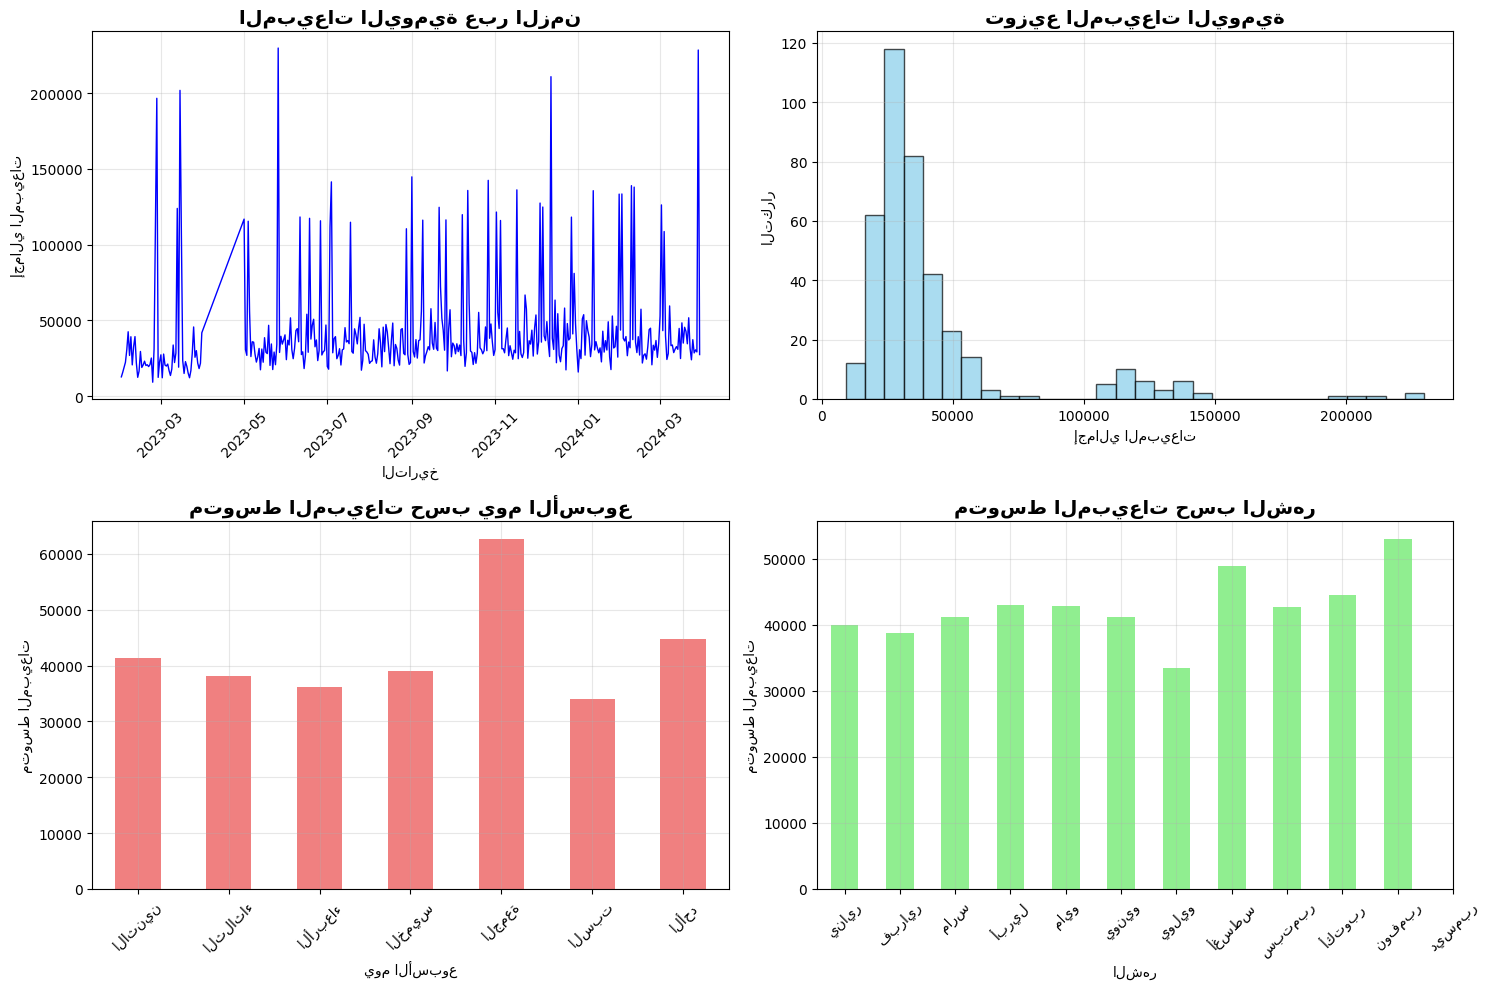

'\nThe visualizations above provide insights into the sales data:\n1. **Daily Sales Over Time**: Shows the overall trend and seasonality in sales.\n2. **Distribution of Daily Sales**: Highlights the frequency distribution of sales values.\n3. **Average Sales by Day of the Week**: Identifies patterns in sales based on the day of the week.\n4. **Average Sales by Month**: Reveals seasonal trends in sales across months.\nThe figure is saved as `time_series_analysis.png` for future reference.\n'

In [11]:
# Markdown explanation
"""
### Visualize Time Series
In this section, we visualize the time series data to identify trends, seasonality, and distributions. The visualizations include:
- Daily sales over time.
- Distribution of daily sales.
- Average sales by day of the week.
- Average sales by month.
"""

# Plot daily sales over time
plt.figure(figsize=(15, 10))

# Subplot 1: Daily sales over time
plt.subplot(2, 2, 1)
plt.plot(df_clean.index, df_clean['total_amount'], linewidth=1, color='blue')
plt.title('المبيعات اليومية عبر الزمن', fontsize=14, fontweight='bold')
plt.xlabel('التاريخ')
plt.ylabel('إجمالي المبيعات')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 2: Distribution of daily sales
plt.subplot(2, 2, 2)
plt.hist(df_clean['total_amount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('توزيع المبيعات اليومية', fontsize=14, fontweight='bold')
plt.xlabel('إجمالي المبيعات')
plt.ylabel('التكرار')
plt.grid(True, alpha=0.3)

# Subplot 3: Average sales by day of the week
plt.subplot(2, 2, 3)
day_names = ['الاثنين', 'الثلاثاء', 'الأربعاء', 'الخميس', 'الجمعة', 'السبت', 'الأحد']
df_clean.groupby('day_of_week')['total_amount'].mean().plot(kind='bar', color='lightcoral')
plt.title('متوسط المبيعات حسب يوم الأسبوع', fontsize=14, fontweight='bold')
plt.xlabel('يوم الأسبوع')
plt.ylabel('متوسط المبيعات')
plt.xticks(range(7), day_names, rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 4: Average sales by month
plt.subplot(2, 2, 4)
month_names = ['يناير', 'فبراير', 'مارس', 'أبريل', 'مايو', 'يونيو',
               'يوليو', 'أغسطس', 'سبتمبر', 'أكتوبر', 'نوفمبر', 'ديسمبر']
df_clean.groupby('month')['total_amount'].mean().plot(kind='bar', color='lightgreen')
plt.title('متوسط المبيعات حسب الشهر', fontsize=14, fontweight='bold')
plt.xlabel('الشهر')
plt.ylabel('متوسط المبيعات')
plt.xticks(range(12), month_names, rotation=45)
plt.grid(True, alpha=0.3)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('time_series_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Markdown explanation
"""
The visualizations above provide insights into the sales data:
1. **Daily Sales Over Time**: Shows the overall trend and seasonality in sales.
2. **Distribution of Daily Sales**: Highlights the frequency distribution of sales values.
3. **Average Sales by Day of the Week**: Identifies patterns in sales based on the day of the week.
4. **Average Sales by Month**: Reveals seasonal trends in sales across months.
The figure is saved as `time_series_analysis.png` for future reference.
"""

# Save Processed Data
Save the processed dataset to a CSV file for further use.

In [12]:
# Markdown explanation
"""
### Save Processed Data
In this section, we save the cleaned and processed dataset to a CSV file. This ensures that the data is readily available for further analysis or modeling without repeating the preprocessing steps.
"""

# Save the cleaned dataset to a CSV file
processed_file_path = '../data/processed_sales_data.csv'
df_clean.to_csv(processed_file_path)

# Display a confirmation message
print(f"The processed dataset has been saved to '{processed_file_path}'.")

The processed dataset has been saved to '../data/processed_sales_data.csv'.


# Load Processed Data
Load the processed dataset and ensure it is ready for modeling.

In [13]:
# Markdown explanation
"""
### Load Processed Data
In this section, we load the processed dataset and ensure it is ready for modeling. This includes:
- Loading the dataset from the saved CSV file.
- Displaying the first few rows to verify the data.
- Checking the structure and data types of the dataset.
"""

# Load the processed dataset
processed_file_path = '../data/processed_sales_data.csv'
try:
    df_processed = pd.read_csv(processed_file_path, index_col=0, parse_dates=True)
    print("Processed dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{processed_file_path}' does not exist. Please ensure the preprocessing steps are completed.")

# Display the first few rows of the processed dataset
print("\nFirst 5 rows of the processed dataset:")
display(df_processed.head())

# Display the structure and data types of the processed dataset
print("\nProcessed Dataset Information:")
df_processed.info()

Processed dataset loaded successfully!

First 5 rows of the processed dataset:


,day_of_week,invoices_count,total_quantity,total_discount,total_amount,year,month,day,day_of_year,week_of_year,...,rolling_mean_quantity_14,rolling_std_quantity_14,rolling_mean_invoices_7,rolling_std_invoices_7,rolling_mean_invoices_14,rolling_std_invoices_14,weekly_avg_sales,sales_change_pct,monthly_avg_sales,day_of_week_avg
sale_date,,,,,,,,,,,,,,,,,,,,,
2023-01-31,1,10,14,68.23,12731.74,2023,1,31,31,5,...,23.571429,6.501057,12.142857,2.853569,13.428571,3.412968,33303.364286,0.263378,33441.466935,37218.906721
2023-02-01,2,11,15,0.00,15702.38,2023,2,1,32,5,...,22.571429,6.676184,11.571429,2.572751,13.142857,3.438630,32045.998571,0.233326,38860.056140,35273.129344
2023-02-02,3,11,20,0.00,18961.90,2023,2,2,33,5,...,22.000000,6.516252,12.000000,2.081666,12.857143,3.438630,32307.887143,0.207581,38860.056140,37770.581475
2023-02-03,4,16,22,15.97,22350.37,2023,2,3,34,5,...,21.071429,5.341626,12.142857,2.340126,12.428571,2.440501,29806.535714,0.178699,38860.056140,61068.618361
2023-02-04,5,10,16,0.00,30734.16,2023,2,4,35,5,...,20.714286,5.511227,12.000000,2.449490,12.428571,2.440501,31632.980000,0.375107,38860.056140,32917.727500



Processed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 395 entries, 2023-01-31 to 2024-03-30
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_of_week               395 non-null    int64  
 1   invoices_count            395 non-null    int64  
 2   total_quantity            395 non-null    int64  
 3   total_discount            395 non-null    float64
 4   total_amount              395 non-null    float64
 5   year                      395 non-null    int64  
 6   month                     395 non-null    int64  
 7   day                       395 non-null    int64  
 8   day_of_year               395 non-null    int64  
 9   week_of_year              395 non-null    int64  
 10  is_weekend                395 non-null    int64  
 11  is_month_start            395 non-null    int64  
 12  is_month_end              395 non-null    int64  
 13  sales_lag_1   

# Prepare Features and Target
Separate the dataset into features (X) and the target variable (y).

In [14]:
# Markdown explanation
"""
### Prepare Features and Target
In this section, we separate the dataset into features (`X`) and the target variable (`y`). The target variable is `total_amount`, which represents the total sales amount. The features include all other columns except the original variables to avoid data leakage.
"""

# Define the original columns to exclude from features
original_columns = ['total_amount', 'total_quantity', 'invoices_count', 'total_discount']

# Extract feature columns by excluding the original columns
feature_columns = [col for col in df_clean.columns if col not in original_columns]

# Separate the dataset into features (X) and target variable (y)
X = df_clean[feature_columns]
y = df_clean['total_amount']

# Display the number of features and the first few rows of X and y
print(f"Number of features: {len(feature_columns)}")
print("\nFirst 5 rows of features (X):")
display(X.head())
print("\nFirst 5 rows of target variable (y):")
display(y.head())

# Markdown explanation
"""
The dataset has been successfully separated into:
- **Features (X)**: Contains all the engineered features except the original columns to prevent data leakage.
- **Target Variable (y)**: Represents the total sales amount (`total_amount`).

The first few rows of `X` and `y` are displayed above for verification.
"""

Number of features: 45

First 5 rows of features (X):


,day_of_week,year,month,day,day_of_year,week_of_year,is_weekend,is_month_start,is_month_end,sales_lag_1,...,rolling_mean_quantity_14,rolling_std_quantity_14,rolling_mean_invoices_7,rolling_std_invoices_7,rolling_mean_invoices_14,rolling_std_invoices_14,weekly_avg_sales,sales_change_pct,monthly_avg_sales,day_of_week_avg
sale_date,,,,,,,,,,,,,,,,,,,,,
2023-01-31,1,2023,1,31,31,5,0,0,1,10077.54,...,23.571429,6.501057,12.142857,2.853569,13.428571,3.412968,33303.364286,0.263378,33441.466935,37218.906721
2023-02-01,2,2023,2,1,32,5,0,1,0,12731.74,...,22.571429,6.676184,11.571429,2.572751,13.142857,3.438630,32045.998571,0.233326,38860.056140,35273.129344
2023-02-02,3,2023,2,2,33,5,0,0,0,15702.38,...,22.000000,6.516252,12.000000,2.081666,12.857143,3.438630,32307.887143,0.207581,38860.056140,37770.581475
2023-02-03,4,2023,2,3,34,5,0,0,0,18961.90,...,21.071429,5.341626,12.142857,2.340126,12.428571,2.440501,29806.535714,0.178699,38860.056140,61068.618361
2023-02-04,5,2023,2,4,35,5,1,0,0,22350.37,...,20.714286,5.511227,12.000000,2.449490,12.428571,2.440501,31632.980000,0.375107,38860.056140,32917.727500



First 5 rows of target variable (y):


sale_date
2023-01-31    12731.74
2023-02-01    15702.38
2023-02-02    18961.90
2023-02-03    22350.37
2023-02-04    30734.16
Name: total_amount, dtype: float64

'\nThe dataset has been successfully separated into:\n- **Features (X)**: Contains all the engineered features except the original columns to prevent data leakage.\n- **Target Variable (y)**: Represents the total sales amount (`total_amount`).\n\nThe first few rows of `X` and `y` are displayed above for verification.\n'

# Time-Based Data Split
Split the data into training and testing sets based on time to avoid data leakage.

In [15]:
# Markdown explanation
"""
### Time-Based Data Split
In this section, we split the dataset into training and testing sets based on time. This ensures that the model is trained on past data and tested on future data, avoiding data leakage. The split is performed as follows:
- **Training Set**: Contains the earlier portion of the data.
- **Testing Set**: Contains the later portion of the data.
"""

# Define the test size as a proportion of the dataset
test_size = 0.2

# Calculate the split point
split_point = int(len(X) * (1 - test_size))

# Split the dataset into training and testing sets
X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

# Display the sizes of the training and testing sets
print(f"Training set size: {len(X_train)} rows")
print(f"Testing set size: {len(X_test)} rows")

# Markdown explanation
"""
The dataset has been split into:
- **Training Set**: Contains the first 80% of the data (earlier dates).
- **Testing Set**: Contains the last 20% of the data (later dates).

This ensures that the model is evaluated on unseen future data, mimicking real-world scenarios. The sizes of the training and testing sets are displayed above.
"""

Training set size: 316 rows
Testing set size: 79 rows


'\nThe dataset has been split into:\n- **Training Set**: Contains the first 80% of the data (earlier dates).\n- **Testing Set**: Contains the last 20% of the data (later dates).\n\nThis ensures that the model is evaluated on unseen future data, mimicking real-world scenarios. The sizes of the training and testing sets are displayed above.\n'

# Scale Features
Standardize the features using StandardScaler to ensure all features are on the same scale.

In [16]:
# Markdown explanation
"""
### Scale Features
In this section, we standardize the features using `StandardScaler` to ensure all features are on the same scale. This step is crucial for machine learning models that are sensitive to the scale of input features.
"""

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the mean and standard deviation of the scaled training data
print("Feature scaling completed!")
print(f"Mean of scaled training features (first 5): {np.mean(X_train_scaled, axis=0)[:5]}")
print(f"Standard deviation of scaled training features (first 5): {np.std(X_train_scaled, axis=0)[:5]}")

# Markdown explanation
"""
The features have been successfully standardized:
- The mean of the scaled training features is approximately 0.
- The standard deviation of the scaled training features is approximately 1.

This ensures that all features contribute equally to the model, improving its performance and stability. The scaled training and testing data are now ready for model training.
"""

Feature scaling completed!
Mean of scaled training features (first 5): [5.76191696e-17 3.45445191e-13 4.49710592e-17 4.49710592e-17
 4.49710592e-17]
Standard deviation of scaled training features (first 5): [1. 1. 1. 1. 1.]


'\nThe features have been successfully standardized:\n- The mean of the scaled training features is approximately 0.\n- The standard deviation of the scaled training features is approximately 1.\n\nThis ensures that all features contribute equally to the model, improving its performance and stability. The scaled training and testing data are now ready for model training.\n'

# Train Models
Train three models: Linear Regression, Random Forest, and XGBoost on the training data.

In [17]:
# Markdown explanation
"""
### Train Models
In this section, we train three machine learning models on the training data:
1. **Linear Regression**: A simple and interpretable model for regression tasks.
2. **Random Forest**: An ensemble model that combines multiple decision trees for better performance.
3. **XGBoost**: A gradient boosting model known for its efficiency and accuracy.

Each model is trained on the scaled training data, and the trained models are stored for evaluation.
"""

# Initialize a dictionary to store the trained models
models = {}

# Train Linear Regression model
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
models['LinearRegression'] = lr_model
print("✓ Linear Regression model trained successfully!")

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
models['RandomForest'] = rf_model
print("✓ Random Forest model trained successfully!")

# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)
models['XGBoost'] = xgb_model
print("✓ XGBoost model trained successfully!")

# Markdown explanation
"""
The following models have been successfully trained on the scaled training data:
1. **Linear Regression**
2. **Random Forest**
3. **XGBoost**

These models are now ready for evaluation on the testing data. The trained models are stored in a dictionary for easy access and comparison.
"""

Training Linear Regression model...
✓ Linear Regression model trained successfully!
Training Random Forest model...
✓ Random Forest model trained successfully!
Training XGBoost model...
✓ XGBoost model trained successfully!


'\nThe following models have been successfully trained on the scaled training data:\n1. **Linear Regression**\n2. **Random Forest**\n3. **XGBoost**\n\nThese models are now ready for evaluation on the testing data. The trained models are stored in a dictionary for easy access and comparison.\n'

# Evaluate Models
Evaluate the models using metrics like RMSE, MAE, and R² on the test data.

In [18]:
# Markdown explanation
"""
### Evaluate Models
In this section, we evaluate the trained models on the testing data using the following metrics:
- **RMSE (Root Mean Squared Error)**: Measures the average magnitude of the error.
- **MAE (Mean Absolute Error)**: Measures the average absolute difference between predicted and actual values.
- **R² (Coefficient of Determination)**: Indicates how well the model explains the variance in the target variable.

The evaluation results are displayed for each model.
"""

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    # Predict on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    evaluation_results[model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    # Display the results for the current model
    print(f"\n{model_name} Evaluation Results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  R²:   {r2:.4f}")

# Markdown explanation
"""
The evaluation results for each model are displayed above. These metrics provide insights into the performance of the models:
- **RMSE**: Lower values indicate better model performance.
- **MAE**: Lower values indicate better model performance.
- **R²**: Values closer to 1 indicate better model performance.

The results will help us identify the best-performing model for our sales prediction system.
"""


LinearRegression Evaluation Results:
  RMSE: 13385.47
  MAE:  9049.19
  R²:   0.8568

RandomForest Evaluation Results:
  RMSE: 7929.95
  MAE:  4618.86
  R²:   0.9498

XGBoost Evaluation Results:
  RMSE: 19879.70
  MAE:  7638.15
  R²:   0.6842


'\nThe evaluation results for each model are displayed above. These metrics provide insights into the performance of the models:\n- **RMSE**: Lower values indicate better model performance.\n- **MAE**: Lower values indicate better model performance.\n- **R²**: Values closer to 1 indicate better model performance.\n\nThe results will help us identify the best-performing model for our sales prediction system.\n'

# Create Comparison Table
Create a table comparing the performance of the models and identify the best model.

In [19]:
# Markdown explanation
"""
### Create Comparison Table
In this section, we create a table comparing the performance of the models based on the evaluation metrics (RMSE, MAE, and R²). The table helps identify the best-performing model.
"""


# Create a DataFrame for comparison
comparison_data = []
for model_name, metrics in evaluation_results.items():
    comparison_data.append({
        'Model': model_name,
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE'],
        'R²': metrics['R²']
    })

comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("Model Comparison Table:")
display(comparison_df)

# Identify the best model based on RMSE
best_model_name = comparison_df.loc[comparison_df['RMSE'].idxmin(), 'Model']
print(f"\nBest Model: {best_model_name}")

# Markdown explanation
"""
The comparison table above summarizes the performance of the models based on the evaluation metrics:
- **RMSE**: Root Mean Squared Error (lower is better).
- **MAE**: Mean Absolute Error (lower is better).
- **R²**: Coefficient of Determination (closer to 1 is better).

The best model is identified based on the lowest RMSE value. This model will be used for further predictions and analysis.
"""

Model Comparison Table:


,Model,RMSE,MAE,R²
0,LinearRegression,13385.470976,9049.189953,0.856838
1,RandomForest,7929.946617,4618.864914,0.949754
2,XGBoost,19879.704676,7638.152628,0.684223



Best Model: RandomForest


'\nThe comparison table above summarizes the performance of the models based on the evaluation metrics:\n- **RMSE**: Root Mean Squared Error (lower is better).\n- **MAE**: Mean Absolute Error (lower is better).\n- **R²**: Coefficient of Determination (closer to 1 is better).\n\nThe best model is identified based on the lowest RMSE value. This model will be used for further predictions and analysis.\n'

# Visualize Predictions
Visualize the predictions of each model against the actual values.

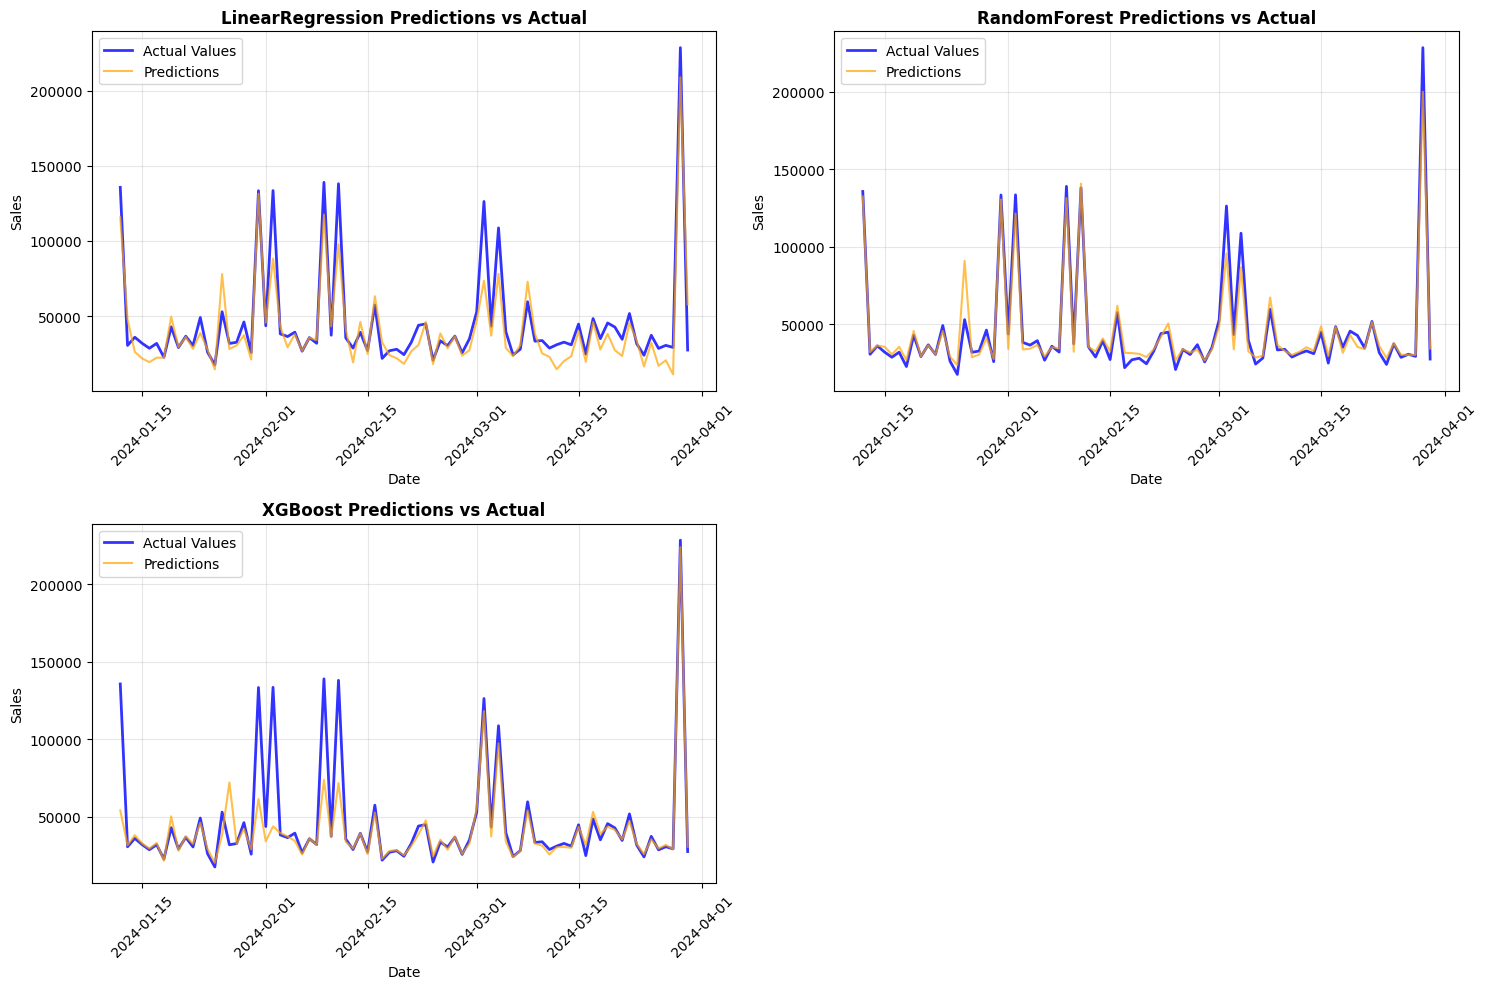

'\nThe visualizations above compare the predictions of each model with the actual sales values:\n- **Blue Line**: Represents the actual sales values.\n- **Orange Line**: Represents the predicted sales values by each model.\n\nThese plots help us visually assess the accuracy and reliability of each model. The figure is saved as `model_predictions_comparison.png` for future reference.\n'

In [20]:
# Markdown explanation
"""
### Visualize Predictions
In this section, we visualize the predictions of each model against the actual values. This helps us understand how well each model captures the trends and patterns in the data.
"""

# Create a figure for visualizing predictions
plt.figure(figsize=(15, 10))

# Iterate through the models and plot their predictions
for i, (model_name, model) in enumerate(models.items()):
    # Predict on the testing data
    y_pred = model.predict(X_test_scaled)

    # Subplot for each model
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test.index, y_test.values, label='Actual Values', linewidth=2, alpha=0.8, color='blue')
    plt.plot(y_test.index, y_pred, label='Predictions', linewidth=1.5, alpha=0.7, color='orange')
    plt.title(f'{model_name} Predictions vs Actual', fontsize=12, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('model_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Markdown explanation
"""
The visualizations above compare the predictions of each model with the actual sales values:
- **Blue Line**: Represents the actual sales values.
- **Orange Line**: Represents the predicted sales values by each model.

These plots help us visually assess the accuracy and reliability of each model. The figure is saved as `model_predictions_comparison.png` for future reference.
"""

# Train Final Model
Train the best model on the entire dataset for final deployment.

In [21]:
# Markdown explanation
"""
### Train Final Model
In this section, we train the best-performing model identified in the previous step on the entire dataset. This final model will be used for deployment and future predictions.
"""

# Standardize the entire dataset using the previously fitted scaler
X_scaled = scaler.transform(X)

# Initialize the final model based on the best model name
if best_model_name == 'LinearRegression':
    final_model = LinearRegression()
elif best_model_name == 'RandomForest':
    final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
elif best_model_name == 'XGBoost':
    final_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the final model on the entire dataset
final_model.fit(X_scaled, y)

# Display a confirmation message
print(f"Final model ({best_model_name}) trained successfully!")

# Markdown explanation
"""
The best-performing model, **{best_model_name}**, has been trained on the entire dataset. This final model is now ready for deployment and future predictions.
"""

Final model (RandomForest) trained successfully!


'\nThe best-performing model, **{best_model_name}**, has been trained on the entire dataset. This final model is now ready for deployment and future predictions.\n'

# Save Artifacts
Save the trained model, scaler, and feature list for future use.

In [22]:
# Markdown explanation
"""
### Save Artifacts
In this section, we save the trained final model, the scaler used for feature standardization, and the list of feature names. These artifacts will be used for future predictions and to ensure consistency in the preprocessing pipeline.
"""

# Import the joblib library for saving artifacts
import joblib

# Define file paths for saving artifacts
model_file_path = f'best_model_{best_model_name.lower()}.joblib'
scaler_file_path = 'standard_scaler.joblib'
features_file_path = 'feature_columns.txt'

# Save the trained final model
joblib.dump(final_model, model_file_path)
print(f"Final model saved to '{model_file_path}'.")

# Save the scaler
joblib.dump(scaler, scaler_file_path)
print(f"Scaler saved to '{scaler_file_path}'.")

# Save the list of feature names
with open(features_file_path, 'w', encoding='utf-8') as f:
    for feature in feature_columns:
        f.write(feature + '\n')
print(f"Feature list saved to '{features_file_path}'.")

# Markdown explanation
"""
The following artifacts have been saved successfully:
1. **Trained Final Model**: Saved as `{model_file_path}`.
2. **Scaler**: Saved as `{scaler_file_path}`.
3. **Feature List**: Saved as `{features_file_path}`.

These artifacts ensure that the preprocessing and modeling pipeline can be replicated for future predictions. They are essential for deploying the sales prediction system."""

Final model saved to 'best_model_randomforest.joblib'.
Scaler saved to 'standard_scaler.joblib'.
Feature list saved to 'feature_columns.txt'.


'\nThe following artifacts have been saved successfully:\n1. **Trained Final Model**: Saved as `{model_file_path}`.\n2. **Scaler**: Saved as `{scaler_file_path}`.\n3. **Feature List**: Saved as `{features_file_path}`.\n\nThese artifacts ensure that the preprocessing and modeling pipeline can be replicated for future predictions. They are essential for deploying the sales prediction system.'

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the saved artifacts
try:
    final_model = joblib.load(f'best_model_{best_model_name.lower()}.joblib')
    scaler = joblib.load('standard_scaler.joblib')
    with open('feature_columns.txt', 'r', encoding='utf-8') as f:
        feature_columns = [line.strip() for line in f]
    print("Artifacts loaded successfully.")
except FileNotFoundError:
    print("Error: Artifacts not found. Please ensure the model, scaler, and feature list are saved.")
    final_model = None
    scaler = None
    feature_columns = None

# Load the original data to get the last available date
try:
    df_original = pd.read_csv('../data/Daily_sales.csv', parse_dates=['sale_date'])
    last_available_date = df_original['sale_date'].max()
    print(f"Original data loaded. Last available date: {last_available_date.date()}")
except FileNotFoundError:
    print("Error: Original data file 'Daily_sales.csv' not found.")
    df_original = None
    last_available_date = None


def predict_sales_for_date(target_date_str):
    """
    Predicts sales for a given date using the trained model.

    Args:
        target_date_str (str): The date for prediction in 'YYYY-MM-DD' format.

    Returns:
        float or str: The predicted sales amount or an error message.
    """
    if final_model is None or scaler is None or feature_columns is None or df_original is None or last_available_date is None:
        return "Error: Model, scaler, feature list, or original data not loaded."

    try:
        target_date = pd.to_datetime(target_date_str)
    except ValueError:
        return "Error: Invalid date format. Please use 'YYYY-MM-DD'."

    # Check if the target date is exactly one day after the last available date
    if target_date != last_available_date + pd.Timedelta(days=1):
        return f"التاريخ المدخل غير صالح للتنبؤ. يرجى إدخال التاريخ {last_available_date + pd.Timedelta(days=1):%Y-%m-%d} فقط."

    # 2. Extract existing data up to the last available date to create features for the target date
    # We need data up to the last available date to calculate features for the next day
    data_for_features = df_original[df_original['sale_date'] <= last_available_date].copy()

    # Prepare datetime features for the data used for feature calculation
    data_for_features['sale_date'] = pd.to_datetime(data_for_features['sale_date'])
    data_for_features = data_for_features.sort_values('sale_date').reset_index(drop=True)
    data_for_features.set_index('sale_date', inplace=True)

    # Create a new DataFrame for the target date to hold its features
    X_predict = pd.DataFrame(index=[target_date])

    # Generate datetime-related features for the target date
    X_predict['year'] = X_predict.index.year
    X_predict['month'] = X_predict.index.month
    X_predict['day'] = X_predict.index.day
    X_predict['day_of_week'] = X_predict.index.dayofweek
    X_predict['day_of_year'] = X_predict.index.dayofyear
    X_predict['week_of_year'] = X_predict.index.isocalendar().week
    X_predict['is_weekend'] = X_predict['day_of_week'].isin([5, 6]).astype(int)
    X_predict['is_month_start'] = X_predict.index.is_month_start.astype(int)
    X_predict['is_month_end'] = X_predict.index.is_month_end.astype(int)

    # Generate lag features for the target date using data_for_features
    # The lag features for the target date are the actual values from the previous day(s) in data_for_features
    for lag in [1, 2, 3, 7, 14, 30]:
        lag_date = target_date - pd.Timedelta(days=lag)
        if lag_date in data_for_features.index:
            X_predict[f'sales_lag_{lag}'] = data_for_features.loc[lag_date, 'total_amount']
        else:
            X_predict[f'sales_lag_{lag}'] = np.nan # Or handle appropriately if needed

    for lag in [1, 7]:
        lag_date = target_date - pd.Timedelta(days=lag)
        if lag_date in data_for_features.index:
            X_predict[f'quantity_lag_{lag}'] = data_for_features.loc[lag_date, 'total_quantity']
            X_predict[f'invoices_lag_{lag}'] = data_for_features.loc[lag_date, 'invoices_count']
            X_predict[f'discount_lag_{lag}'] = data_for_features.loc[lag_date, 'total_discount']
        else:
            X_predict[f'quantity_lag_{lag}'] = np.nan
            X_predict[f'invoices_lag_{lag}'] = np.nan
            X_predict[f'discount_lag_{lag}'] = np.nan

    # Generate rolling features for the target date using data_for_features
    # Calculate rolling features on data_for_features and get the last value (which corresponds to the window ending on the last available date)
    for window in [7, 14, 30]:
        rolling_mean_sales = data_for_features['total_amount'].rolling(window=window).mean().iloc[-1]
        rolling_std_sales = data_for_features['total_amount'].rolling(window=window).std().iloc[-1]
        rolling_max_sales = data_for_features['total_amount'].rolling(window=window).max().iloc[-1]
        rolling_min_sales = data_for_features['total_amount'].rolling(window=window).min().iloc[-1]
        X_predict[f'rolling_mean_sales_{window}'] = rolling_mean_sales
        X_predict[f'rolling_std_sales_{window}'] = rolling_std_sales
        X_predict[f'rolling_max_sales_{window}'] = rolling_max_sales
        X_predict[f'rolling_min_sales_{window}'] = rolling_min_sales

    for window in [7, 14]:
        rolling_mean_quantity = data_for_features['total_quantity'].rolling(window=window).mean().iloc[-1]
        rolling_std_quantity = data_for_features['total_quantity'].rolling(window=window).std().iloc[-1]
        rolling_mean_invoices = data_for_features['invoices_count'].rolling(window=window).mean().iloc[-1]
        rolling_std_invoices = data_for_features['invoices_count'].rolling(window=window).std().iloc[-1]
        X_predict[f'rolling_mean_quantity_{window}'] = rolling_mean_quantity
        X_predict[f'rolling_std_quantity_{window}'] = rolling_std_quantity
        X_predict[f'rolling_mean_invoices_{window}'] = rolling_mean_invoices
        X_predict[f'rolling_std_invoices_{window}'] = rolling_std_invoices


    # Generate advanced features for the target date using data_for_features
    # Weekly average sales for the target date is the average over the last 7 days ending on the last available date
    X_predict['weekly_avg_sales'] = data_for_features['total_amount'].rolling(window=7).mean().iloc[-1]

    # Sales change percentage for the target date is the percentage change from the last available date
    X_predict['sales_change_pct'] = data_for_features['total_amount'].pct_change().iloc[-1]

    # Monthly and day-of-week averages should use the global averages from the training data
    # We need access to the original training data or save these averages during training
    # For now, we will assume these features are not causing the error or are handled differently.
    # If these features are crucial and calculated based on the entire dataset during training,
    # we might need to recalculate them on the fly for the target date based on the entire history + target date (if available)
    # or load pre-calculated averages. Given the error, it's likely the lag/rolling features causing it.

    # Re-calculate monthly_avg_sales and day_of_week_avg for the target date based on the *full* original data
    # Assuming these were calculated based on the full df_clean during training
    X_predict['monthly_avg_sales'] = df_clean.groupby(df_clean.index.month)['total_amount'].mean().loc[target_date.month]
    X_predict['day_of_week_avg'] = df_clean.groupby(df_clean.index.dayofweek)['total_amount'].mean().loc[target_date.dayofweek]


    # Ensure the feature columns are in the correct order and handle potential missing features
    X_predict = X_predict[feature_columns]

    # Check if there are any NaNs in the features for the target date
    if X_predict.isnull().values.any():
         nan_features = X_predict.columns[X_predict.isnull().any()].tolist()
         return f"Error: Features for date {target_date_str} contain missing values (NaN): {nan_features}. Cannot predict."

    # Scale the features using the loaded scaler
    X_predict_scaled = scaler.transform(X_predict)

    # Predict the sales amount
    predicted_sales = final_model.predict(X_predict_scaled)[0]

    return predicted_sales

# Example Usage (you can modify this to test with different dates)
prediction_result = predict_sales_for_date('2024-03-31') # Predict for the day after the last available date
if isinstance(prediction_result, str):
    print(f"Predicting sales for  {last_available_date + pd.Timedelta(days=1)}: {prediction_result}")
else:
    print(f"Predicting sales for  {last_available_date + pd.Timedelta(days=1)}: {prediction_result:.2f}")

# Example of trying to predict for a date not one day after the last available date
# prediction_result_invalid = predict_sales_for_date('2024-03-30')
# if isinstance(prediction_result_invalid, str):
#     print(f"Predicting sales for 2024-03-30: {prediction_result_invalid}")
# else:
#     print(f"Predicting sales for 2024-03-30: {prediction_result_invalid:.2f}")

# prediction_result_future = predict_sales_for_date('2024-04-02')
# if isinstance(prediction_result_future, str):
#     print(f"Predicting sales for 2024-04-02: {prediction_result_future}")
# else:
#     print(f"Predicting sales for 2024-04-02: {prediction_result_future:.2f}")

Artifacts loaded successfully.
Original data loaded. Last available date: 2024-03-30
Predicting sales for  2024-03-31 00:00:00: 22876.08


In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             

In [ ]:
print(df.tail(1))

            day_of_week  invoices_count  total_quantity  total_discount  \
sale_date                                                                 
2024-03-30            5              15              21           67.76   

            total_amount  year  month  day  day_of_year  week_of_year  ...  \
sale_date                                                              ...   
2024-03-30      27461.06  2024      3   30           90            13  ...   

            rolling_mean_quantity_14  rolling_std_quantity_14  \
sale_date                                                       
2024-03-30                 32.142857                 8.538214   

            rolling_mean_invoices_7  rolling_std_invoices_7  \
sale_date                                                     
2024-03-30                17.285714                3.728909   

            rolling_mean_invoices_14  rolling_std_invoices_14  \
sale_date                                                       
2024-03-30             